## Modelagem


In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score,precision_recall_curve, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

from sklearn.metrics import confusion_matrix

In [9]:
#Essa planilha foi criada em R
#Colocar a explicacao de ATRATIVIDADE etc
df=pd.read_excel("BD_logit.xlsx")

In [13]:
df = df[["ORIGEM.x","AERO.x","quantidadeviagem", "DISTANCIA","TEMPO", "UTILIDADE","ATRATIVIDADE","U_TARIFA","U_PONTUALIDADE","U_CONECTIVIDADE"]]
df["AERO_C"] = df["AERO.x"]
df["AERO_C"] = df["AERO_C"].replace({"SBFL": 0, "SBJA": 1}).infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True);

In [225]:
df.tail()

,ORIGEM.x,AERO.x,quantidadeviagem,DISTANCIA,TEMPO,UTILIDADE,ATRATIVIDADE,U_TARIFA,U_PONTUALIDADE,U_CONECTIVIDADE,AERO_C
20586,Videira,SBFL,16,437.535,20255.160,11.451159,0.324939,1.779462,0.087840,9.583856,0
20587,Xangri-Lá,SBFL,14,347.012,14716.562,11.451159,0.210126,1.779462,0.087840,9.583856,0
20588,Xangri-Lá,SBFL,12,347.012,14716.562,11.451159,0.210126,1.779462,0.087840,9.583856,0
20589,Xangri-Lá,SBJA,40,177.974,7792.731,22.793438,0.789874,16.086295,0.053743,6.653401,1
20590,Xangri-Lá,SBJA,10,177.974,7792.731,22.793438,0.789874,16.086295,0.053743,6.653401,1


In [227]:
quantidaddeviagem = pd.DataFrame(df.groupby(["ORIGEM.x", "AERO.x"])["quantidadeviagem"].sum())
outros = pd.DataFrame(df.groupby(["ORIGEM.x", "AERO.x"])[["DISTANCIA", "TEMPO", "UTILIDADE", "ATRATIVIDADE", "U_TARIFA", "U_PONTUALIDADE", "U_CONECTIVIDADE", "AERO_C"]].mean())
df_novo = pd.merge(outros, quantidaddeviagem, left_index=True, right_index=True)
df_novo.head()

DISTANCIA      TEMPO  UTILIDADE  ATRATIVIDADE  \
ORIGEM.x       AERO.x                                                  
Agrolândia     SBFL      241.013  11909.587  11.451159      0.409435   
Alfredo Wagner SBFL      124.464   6143.470  11.451159      0.473263   
               SBJA      189.787  10987.098  22.793438      0.526737   
Alvorada       SBJA      290.006  12964.501  22.793438      0.753302   
Angelina       SBFL       91.349   4536.699  11.451159      0.508555   

                        U_TARIFA  U_PONTUALIDADE  U_CONECTIVIDADE  AERO_C  \
ORIGEM.x       AERO.x                                                       
Agrolândia     SBFL     1.779462        0.087840         9.583856     0.0   
Alfredo Wagner SBFL     1.779462        0.087840         9.583856     0.0   
               SBJA    16.086295        0.053743         6.653401     1.0   
Alvorada       SBJA    16.086295        0.053743         6.653401     1.0   
Angelina       SBFL     1.779462        0.087840         9.583856     0.0   

                       quantidadeviagem  
ORIGEM.x       AERO.x                    
Agrolândia     SBFL                 226  
Alfredo Wagner SBFL                 298  
               SBJA                  16  
Alvorada       SBJA                 163  
Angelina       SBFL                 124

In [229]:
df_novo = df_novo.reset_index()
X = df_novo[["ATRATIVIDADE"]]
y = df_novo["AERO_C"]
weights = df_novo["quantidadeviagem"]

In [231]:
X_train, X_test, y_train, y_test, weights_train, _ = train_test_split(
    X, y, weights, test_size=0.2, random_state=42
)    

In [233]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((232, 1), (58, 1), (232,), (58,))

In [235]:
model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Coeficiente: {model.coef_}, Intercept: {model.intercept_}")

Coeficiente: [[5.7881364]], Intercept: [-3.40791291]


In [239]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de ser classe 1

# Métricas de avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob):.2f}")

Acurácia: 0.84
Precisão: 0.94
Recall: 0.68
AUC-ROC: 0.99


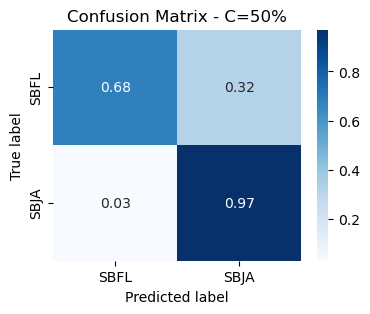

In [147]:
def plot_confusion_matrix(cnf_matrix, classes, title, normalize=False):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(cnf_matrix, annot=True, fmt=fmt, cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


class_names = ['SBFL', 'SBJA']
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion Matrix - C=50%', normalize=True)

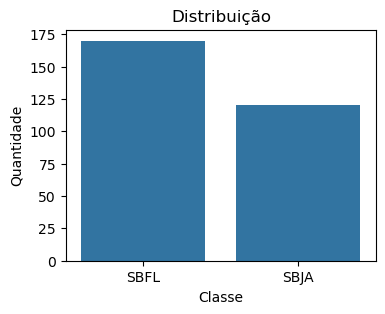

In [241]:
#Recall deu um pouco baixo e muitos SBFL sendo classificados como SBJA
#Nao achei que esta muito desbalanceado o df
class_distribution = df_novo['AERO_C'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Distribuição')
plt.xticks([0, 1], ['SBFL', 'SBJA']) 
plt.show();

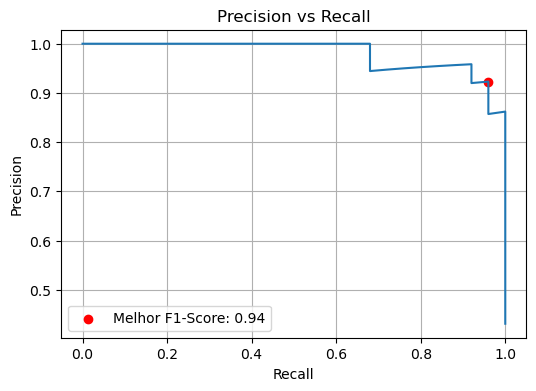

In [247]:
plt.figure(figsize=(6, 4))
plt.plot(recall, precision)

best_idx = np.argmax(f1_scores)
plt.scatter(recall[best_idx], precision[best_idx], color='red', label=f'Melhor F1-Score: {best_f1_score:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend()
plt.grid(True)
plt.show()

In [249]:
y_pred_adjusted = (y_prob > best_threshold).astype(int)
print(f"F1-Score: {f1_score(y_test, y_pred_adjusted):.4f}")


F1-Score: 0.9200


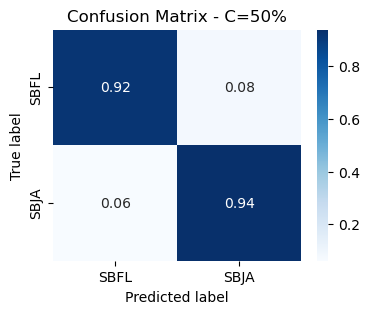

In [251]:
#Ajuste ficou bem melhor!
class_names = ['SBFL', 'SBJA']
cnf_matrix = confusion_matrix(y_test, y_pred_adjusted, labels=[1, 0])
plot_confusion_matrix(cnf_matrix, classes=class_names,
                     title='Confusion Matrix - C=50%', normalize=True)

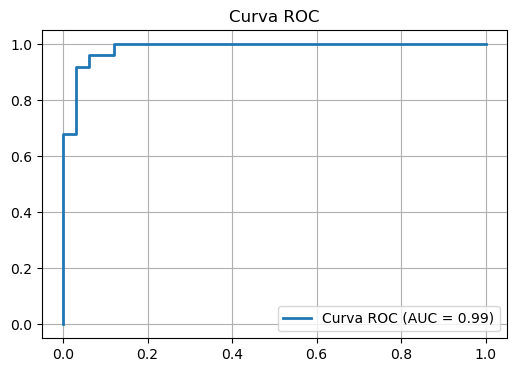

In [253]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

auc_score = roc_auc_score(y_test, y_prob)

# Plota a curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Esse modelo será utilizado para projetar a demanda de cada aeroporto no longo prazo. Para isto, será projetado a Atratividade e o total de passageiros aéreos da região e será utilizada a propabilidade para atribuir os pax de cada município para determinado aeroporto. 

Assim, em determinado município, os usuários terão probabilidade X% de optarem por SBFL e 1-X% para optarem por SBJA. Serão esperados Y mil usuários no longo prazo que serão alocados X%*Y para SBFL e (1-X%)*Y para SBJA